In [22]:
import matplotlib.pyplot as plt
import numpy as np
import random
from numpy.linalg import inv

$$ C = \{ z \in \mathbb{R}^{n-1} : -\lambda \leq z_i \leq \lambda, \, i = 1,2,...,n-1 \}
$$

In [23]:
def project(vector,l):
    res = vector[:]
    for i in range(len(vector)):
        if(int(vector[i]) > l):
            res[i]=l
        elif(int(vector[i]) < -l):
            res[i]=-l
            
    return res

$$
L = 
\begin{bmatrix}
1 & -1 & 0 & 0 & ... & 0 &0\\
0 & 1 & -1 & 0 & ... & 0 &0\\
0 & 0 & 1 & -1 & ... & 0&0 \\
. & . & . & . &    & . & .\\
. & . & . & . &    & . & .\\
. & . & . & . &    & . & .\\
0 & 0 & 0& 0&... & 1& -1

\end{bmatrix}
$$

In [24]:
def getL(n):
    L = [[0 for _ in range(n)] for _ in range(n-1)]
    for i in range(n-1):
        L[i][i] = 1
        L[i][i+1] = -1
    return np.matrix(L)

**The resulting regularized least squares problem**

 $$\underset{x}{\min} \|x - b\|^2 + \lambda \|Lx\|^2 \quad $$
 
 $$\textbf{x}_{RLS}(\lambda) = (I + \lambda L^TL)^{-1}b$$



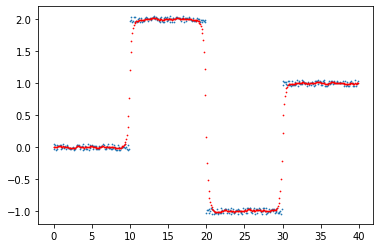

In [25]:
x = np.arange(0,40,0.1)  
p = [0,2,-1,1]
y = [p[int(x[i]/10)] + random.uniform(-0.05,0.05) for i in range(len(x))]
L = [[0 for _ in range(len(x))] for _ in range(len(x)-1)]
for i in range(len(x)-1):
    L[i][i] = 1
    L[i][i+1] = -1
L = np.matrix(L)
y2 = inv(np.identity(len(x)) +  5*L.transpose()*L) * np.matrix(y).transpose()
plt.scatter(x,y,s = 0.5)
plt.scatter(x,[float(i) for i in y2 ],color="red",s = 0.5)
plt.show()


$$ \mu_{k+1} = P_C(\mu_k - (I - \frac{1}{4}LL^T)\mu_k + \frac{1}{2} L y) $$


In [28]:
def gradient_project_method(y , l):
    res = np.matrix([random.uniform(-l,l) for _ in range(len(y)-1)]).transpose()
    L = getL(len(y))
    LL=L*L.transpose()
    for _ in range(500):
        res = project(res - (np.identity(len(LL)) *  0.25 * LL) * res + 0.5 * L * y , l)
    return res


$$x^* = y - (L^T)^{-1} \mu^*
 $$

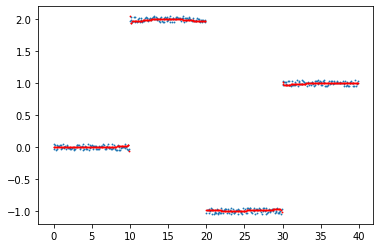

In [29]:
miu_star = gradient_project_method(np.matrix(y).transpose(),1)  

x_star = np.matrix(y).transpose() - 0.5 * getL(len(y)).transpose() * miu_star
s_star = [float(i) for i in x_star]
plt.scatter(x,y,s = 0.7)
plt.scatter(x,s_star,s = 0.7,color="red")
plt.show()